# Stock Prediction Using Regression

In [380]:
import numpy as np
import pandas as pd
import sklearn
import pandas_datareader.data as dr
import numpy
import datetime as dt
import matplotlib.pyplot as plt

## Loding the data 
Using the pandas_datareader library, we loaded the Apple stock price statistics for the past 10 years. I excluded the last ~30 days in order to include it in the test data.

In [453]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2019, 7, 21)

df = dr.DataReader("AAPL", 'yahoo', start, end)

print("Dataframe head:")
display(df.head())

print("Dataframe tail:")
display(df.tail())

Dataframe head:


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249


Dataframe tail:


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-15,205.869995,204.000000,204.089996,205.210007,16947400.0,204.433273
2019-07-16,206.110001,203.500000,204.589996,204.500000,16866800.0,203.725952
2019-07-17,205.089996,203.270004,204.050003,203.350006,14107500.0,202.580307
2019-07-18,205.880005,203.699997,204.000000,205.660004,18582200.0,204.881561
2019-07-19,206.500000,202.360001,205.789993,202.589996,20929300.0,201.823181


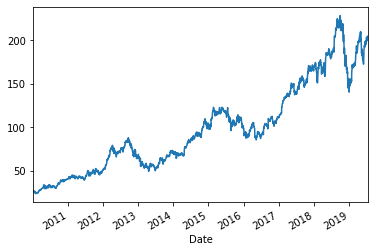

In [382]:
df["Adj Close"].plot();

## Feature Engineering

Added two more features to the data:
* The high to low percentage change for each trading day
* The percentage change from begining to end for each trading day

In [455]:
df['HighLowPer'] = 100 * (df['High'] - df['Low']) / df['Close']
df['ChangePer'] = 100 * (df['Close'] - df['Open']) / df['Open']

The summarized statistics for each feature in the data can be calculated simply using the describe method.

In [456]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,HighLowPer,ChangePer
count,2402.000000,2402.000000,2402.000000,2402.000000,2.402000e+03,2402.000000,2402.000000,2402.000000
mean,105.257767,103.369846,104.330868,104.337951,7.716680e+07,98.075045,1.867837,-0.000169
std,50.121809,49.298222,49.683231,49.720494,5.920738e+07,50.842294,1.126361,1.282497
min,28.000000,27.178572,27.481428,27.435715,1.136200e+07,23.943514,0.415020,-6.633069
25%,64.123213,62.891430,63.435715,63.301786,3.254165e+07,56.209198,1.152255,-0.720349
50%,97.684998,95.819286,96.810001,96.775002,5.877475e+07,90.257355,1.631669,0.040353
75%,138.462494,136.962502,137.762501,138.287495,1.048166e+08,133.072086,2.290872,0.746319
max,233.470001,229.779999,230.779999,232.070007,4.702495e+08,228.523819,23.959393,8.696110


## Splitting Data
Splitting data into X and y and loading final test data (the last 30 days of trading)

In [458]:
leave_out = 30  # days
y = df['Adj Close'].shift(-leave_out)[0:-leave_out]
X = df[:-leave_out]
X_test = df[-leave_out:]

start = dt.datetime(2019, 7, 23)
end = dt.datetime(2019, 9, 3)

df_test = dr.DataReader("AAPL", 'yahoo', start, end)
y_test = df_test['Adj Close']

## Training and Validation Split

We use an 80/20 training versus validation split.

In [460]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(np.array(X), 
                                                  np.array(y), 
                                                  test_size = 0.2)

## Training the Regression Models

In [461]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
pred_lin = reg_lin.predict(X_val)
r2_lin = r2_score(y_val, pred_lin)

reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train, y_train)
pred_dt = reg_dt.predict(X_val)
r2_dt = r2_score(y_val, pred_dt)

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
pred_rf = reg_rf.predict(X_val)
r2_rf = r2_score(y_val, pred_rf)

/home/aitabuzaid/venv/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Performance on Validation Data
Performs well on training and validation data 

In [467]:
print('R2 score for validation data using the linear regression model: {:04.3f}'.format(r2_lin))
print('R2 score for validation data using the decision tree model: {:04.3f}'.format(r2_dt))
print('R2 score for validation data using the random forest model: {:04.3f}'.format(r2_rf))

R2 score for validation data using the linear regression model: 0.957
R2 score for validation data using the decision tree model: 0.950
R2 score for validation data using the random forest model: 0.965


In [468]:
future_pred = reg_rf.predict(X_test)

## Performance on Test Data
...And very poorly on unseen test data (a sign of overfitting)

In [469]:
print('R2 score for test data using the random forest model: {:04.3f}'.format(r2_score(future_pred, y_test)))

R2 score for test data using the random forest model: -4.962


In [471]:
df_test['Adj Close Pred'] = future_pred

## Plotting Future Stock Prediction
The actual versus the predicted cost for the last thirty days are plotted below. As can be seen, a regression model trained on historical stock price data is not capable of predicting future stock data. I hypothesize that stock prices depend on external data that are not included in the current model. Multiple concerns can be identified:
* The model does not consider that stock prices are time series data and as such, using more advanced algorithms such as LSTM or Reinforcement Learning is critical.
* The model only considers historical price data for training. The model should be improved by using sentiment analysis on news, twitter, and other publications related to the stock market. 

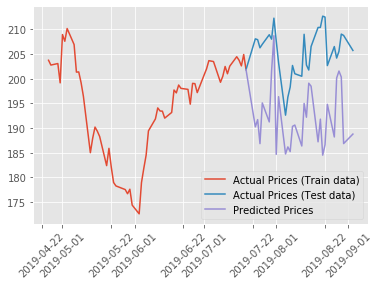

In [472]:
import matplotlib.pyplot as plt

fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.style.use('ggplot')

pt = plt.plot(df['Adj Close'][-60:], label='Actual Prices (Train data)')

df_test.loc[df['Adj Close'].index[-1]] = df['Adj Close'][-1]
df_test.sort_index(inplace=True)

plt.plot(df_test['Adj Close'], label='Actual Prices (Test data)')
plt.plot(df_test['Adj Close Pred'], label='Predicted Prices')
ax.tick_params(axis ='x', rotation =45) 
plt.legend();
